## 분류 
- 분류-> 명시적인 답이 있는 레이블이 있는 머신러닝 학습 방식으로-> 지도학습 대표적인 것
- 이진분류, 다중분류 여러가지 분류가 진행된다.
- 가장 기본적인 의사결정 나무 원리를 정확히 이해하자.
- 분류 알고리즘 -> 앙상블 
- 앙상블 서로 같거나 다른 알고리즘 결합하는 형태
- 배깅/ 부스팅 방식으로 나뉜다.

### 결정트리 
- 가지치기형태로 나무 형태기 때문에 의사결정 나무
- 분류하기 위해서 나무형태로 나누게 된다. 
- 장점 
- 너무나 쉽고 이해하기 좋다. 스케일링, 정규화에 영향이 적다.
- 단점 
- 트리가 깊을수록 과적합일 확률이 높다.
- 잘 사용하지는 않는다. 단순한 분할로 인해서 예측 정확도도 높지 않고 
- 간단한 시각화 정도로 해당 데이터에 대한 인사이트는 볼 수 있다.

- 분할
- if/else 나누는 개념
- 시작점인 뿌리 루트 노드에서 -> 규칙 노드들과 마지막 리프노드 
- 과적합 문제기 때문에 가능한 가장 적은 분할 결정 노드로 예측 정확도를 높여야 하는데,
- 가지치기 즉 분류에 대한 규칙이 필요하다.
- 어떤 식으로 데이터를 나눠서 분류할 것인가?


### 데이터를 어떤 식으로 분리 기준 해야 하는가?
- 분리에대해 어떤 기준?
- 동질성과 이질성
- 데이터가 균일한 것들로 나눠지는 것
### 균일한 것이 무엇인가?
- 주머니 3개가 있다.

- A 주머니에는 ( 빨간공 3/ 노란공 2) 
- B 주머니에는 ( 빨간공 4/ 노란공 1)
- C 주머니에는 ( 빨간공 5/ 노란공 0)

- 어떤 게 균일한 것일까?
- 가장 균일하다는 것은 C주머니다.
- 주머니 안에 들어간 내용물이 동일하다.

---
- 결국에는 데이터를 나눈다는 것이 균일도가 높은 데이터 세트를 먼저 선택해서 점점 나눠지는 것이다. 
- 정보의 균일도 데이트 세트로 쪼개지면서 가지치면서 또 균일도에 따라 서브데이터를 만들고 내려가면서 가지치형태로 반복을 하는 것이 DT
- 정보의 균일도 측정하는 기준?
- 엔트로피 지수
- 지니 지수
- 정보이득을 위해서 측정을 하는 것 IG Information gain 정보를 얼마나 얻을 수 있는가?

---
- 결국 정보이득에 대해서 엔트로피와 지니 지수 중 어떤 것으로 선택하는 것!
### 엔트로피지수는 무엇인가?
- 정보이득의 개념
- 데이터의 혼잡도를 나타낸다.
- 서로 다른 값이 섞여있으면 엔트로피값이 높고, 같은 값이 섞여 있으면 엔트로피값이 낮다.
- 무질서, 혼잡도
- 무질서한 정도를 나타내는 지표
- 사전 엔트로피 - 사후 엔트로피( 불확실성이 얼마나 줄어들었는가?) 
- 이 값이 크면 불확실성이 많이 감소했다
- IGR( Information Gain Ratio)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def entropy(x):
    return (-x*np.log2(x)).sum()

- entropy 예시
- 출석률 생각해 보자
- 데이터 분석 중급반 (상) 10번 출석
- 1 출석
- 2 출석
- 3 출석
- 4 출석
- 5 출석
- 6 출석
- 7 불참
- 8 불참
- 9 불참
- 10 출석

- 엔트로피를 계산해 보자!

- 엔트로피 계산을 위해서는 1차적으로 (출석, 불참) 발생한 비율을 계산해야 한다.
- 출석p(7/10) + 불참p(3/10)

In [16]:
print(0.7,'출석')
print(0.3,'불참')


print(0.9,'출석')
print(0.1,'불참')


0.7 출석
0.3 불참
0.9 출석
0.1 불참


In [17]:
df_t=entropy(0.9)
df_f=entropy(0.1)

In [15]:
df_t +df_f

0.8812908992306927

In [18]:
df_t +df_f

0.4689955935892812

In [19]:
# 샘플데이터를 생성합니다.
group_1 = np.array([0.3, 0.4, 0.3])
group_2 = np.array([0.7, 0.2, 0.1])
group_3 = np.array([0.01, 0.01, 0.98])

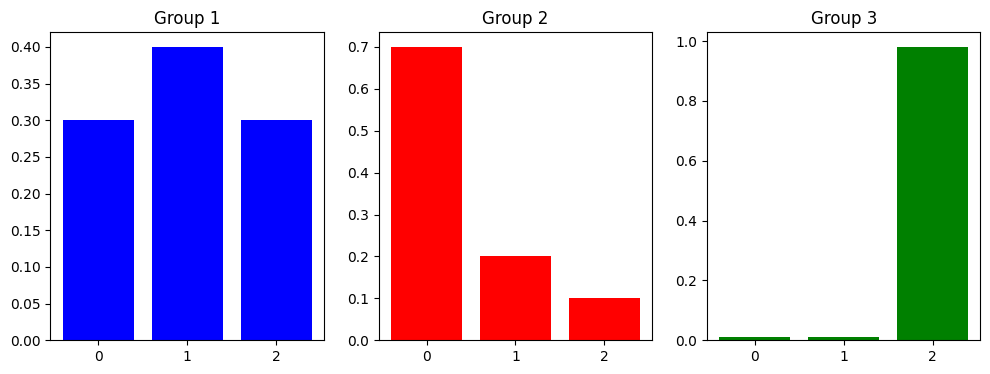

In [20]:
fig, axes = plt.subplots(1, 3)
fig.set_size_inches(12, 4)
axes[0].bar(np.arange(3), group_1, color='blue')
axes[0].set_title('Group 1')
axes[1].bar(np.arange(3), group_2, color='red')
axes[1].set_title('Group 2')
axes[2].bar(np.arange(3), group_3, color='green')
axes[2].set_title('Group 3')
plt.show()

In [21]:
entropy_1 = entropy(group_1)
entropy_2 = entropy(group_2)
entropy_3 = entropy(group_3)

print(f'Group 1: {entropy_1:.3f}\nGroup 2: {entropy_2:.3f}\nGroup 3: {entropy_3:.3f}')

Group 1: 1.571
Group 2: 1.157
Group 3: 0.161


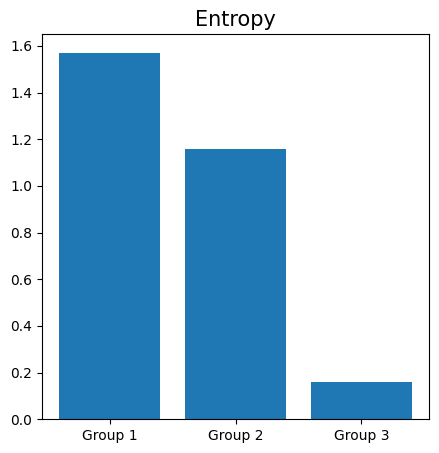

In [22]:
plt.figure(figsize=(5, 5))
plt.bar(['Group 1', 'Group 2', 'Group 3'], [entropy_1, entropy_2, entropy_3])
plt.title('Entropy', fontsize=15)
plt.show()

### 지니 계수 
- 불평등 지수 
- 0이 가장 평등, 1로 갈수록 불평등 
- 지니계수가 낮을수록 균일도가 높다라는 것으로 해석, 지니계수가 낮은 속성으로 기준 분할 
- 코라도 지니가 만든 지니계수 
- 소득분배 완전히 평등하면 기울기가 1인 대각선이 된다.
- 지니계수가 궁금하신 분은 키워드 검색하시면 됩니다.

In [35]:
def gini(x):
    return 1-((x/x.sum())**2).sum()

- 지니계수 예시로 만들어 보기 

In [24]:
df_gn=pd.DataFrame({'중급반':[0,1,2,3,4],
             '기초반':[10,9,8,7,6]})

In [25]:
df_gn

,중급반,기초반
0,0,10
1,1,9
2,2,8
3,3,7
4,4,6


- 0~ 4인덱스 전체는 10
- 지니지수 계산해 보자!

- 조건부확률로 접근한다

- index 0  1- [(0/10)**2+ (10/10)**2] = 0
- index 1  1- [(1/10)**2+ (9/10)**2] = 0.18
- index 2  1- [(1/10)**2+ (9/10)**2] = 0.32
..
- index 3  1- [(1/10)**2+ (9/10)**2] = 0.48

In [28]:
1- ((1/10)**2 + (9/10)**2)

0.17999999999999994

In [30]:
1- ((4/10)**2 + (6/10)**2)

0.48

In [31]:
# 샘플데이터를 생성합니다.
group_1 = np.array([50, 50])
group_2 = np.array([30, 70])
group_3 = np.array([0, 100])

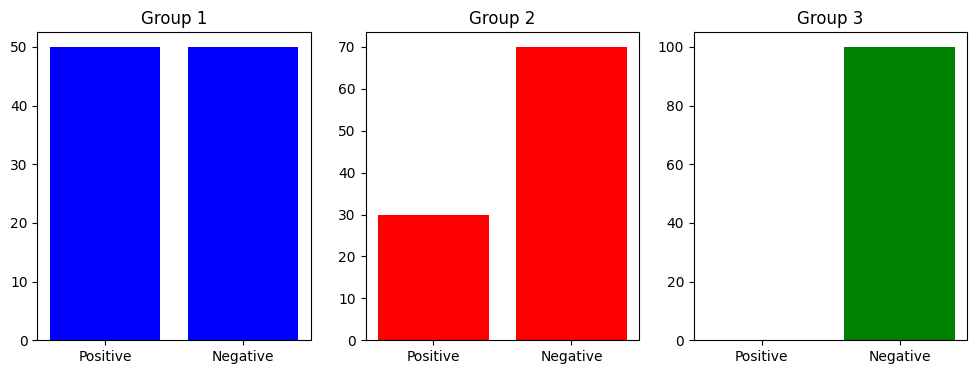

In [32]:
fig, axes = plt.subplots(1, 3)
fig.set_size_inches(12, 4)
axes[0].bar(['Positive', 'Negative'], group_1, color='blue')
axes[0].set_title('Group 1')
axes[1].bar(['Positive', 'Negative'], group_2, color='red')
axes[1].set_title('Group 2')
axes[2].bar(['Positive', 'Negative'], group_3, color='green')
axes[2].set_title('Group 3')
plt.show()

In [37]:
gini_1 = gini(group_1)
gini_2 = gini(group_2)
gini_3 = gini(group_3)

print(f'Group 1: {gini_1:.3f}\nGroup 2: {gini_2:.3f}\nGroup 3: {gini_3:.3f}')

Group 1: 0.500
Group 2: 0.420
Group 3: 0.000


### DT 알고리즘도 여러 가지가 있다.
- CART( Classification and Regression Tree)
- C4.5 C5.0
- CHAID (카이제곱분석 방법으로)

- 이진분류냐 다중분류에 따라 달라지고
- 데이터가 종속형 범주형이냐에 따라 달라진다.

- 기본적으로 우리가 디폴트는 이진분류에 CART 방식이다. CART 지니계수로 진행한다.

### 필수과제
- 지니, 엔트로피지수 개념 정리하기
- 위의 예시 코드 외에 새로운 예시를 만들어서 직접 계산해 보기